# **Heart disease Prediction using Logistic Regression & Decision Tree**




















> ***Created by: Pancham Desai***

## **Context**


---
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

![alt text](https://2rdnmg1qbg403gumla1v9i2h-wpengine.netdna-ssl.com/wp-content/uploads/sites/3/2020/01/mildHeartAttack-866257238-770x553-650x428.jpg)



## **Problem Statement**: 

---



To predict if the patient will have a heart disease or not





## **Attribute Information :**

|Features|Description|
|-----|-----|
|1. age|(in years)|
|2. sex:| (1 = male; 0 = female)|
|3. cp: | chest pain type|
|4. trestbps:| resting blood pressure (in mm Hg on admission to the                     | hospital)|
|5. chol:    |    serum cholestoral in mg/dl|
|6. fbs:     |(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)|
|7. restecg: | resting electrocardiographic results|
|8. thalach: | maximum heart rate achieved |
|9. exang:   |exercise induced angina (1 = yes; 0 = no)
|10. oldpeak:|ST depression induced by exercise relative to rest|
|11. slope:  |the slope of the peak exercise ST segment|
|12. ca:     |number of major vessels (0-3) colored by flourosopy|
|13. thal:   |3 = normal; 6 = fixed defect; 7 = reversable defect|
|14. target: | 1 or 0                                            |

## **About Dataset**:


In [0]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphss
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Change column display number during print
pd.set_option('display.max_columns', 500)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix,precision_score,f1_score
import itertools
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (4).csv


In [22]:
#Loading The Dataset
import io
#The command written below is generally used to load .csv format file or .data format file.
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0


## **Understand Structure of data**

---



The .info() command helps us to understand the structure of data i.e how many rows does the dataset have ? how many columns the dataset consist of? What type of data does each column holds ? for example( object/string,int, float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## **Data Analysis**

In [24]:
# Adaptive binning on 'Age' using quantiles
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df['age'].quantile(quantile_list)
quantile_labels = ['29-47', '48-55', '56-60', '61-77']
df['age_group'] = pd.qcut(df['age'], q=quantile_list, labels=quantile_labels)

#Adaptive binning on 'trestbps' using quantiles
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df['trestbps'].quantile(quantile_list)
quantile_labels = ['94-120', '121-130', '131-140', '141-200']
df['trestbps_group'] = pd.qcut(df['trestbps'], q=quantile_list, labels=quantile_labels)

#Adaptive binning on 'chol' using quantiles
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df['chol'].quantile(quantile_list)
quantile_labels = ['126-210', '211-239', '240-274', '275-564']
df['chol_group'] = pd.qcut(df['chol'], q=quantile_list, labels=quantile_labels)

#Adaptive binning on 'thalach' using quantiles
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df['thalach'].quantile(quantile_list)
quantile_labels = ['0-131', '132-152', '153-166', '167-202']
df['thalach_group'] = pd.qcut(df['thalach'], q=quantile_list, labels=quantile_labels)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 18 columns):
age               1025 non-null int64
sex               1025 non-null int64
cp                1025 non-null int64
trestbps          1025 non-null int64
chol              1025 non-null int64
fbs               1025 non-null int64
restecg           1025 non-null int64
thalach           1025 non-null int64
exang             1025 non-null int64
oldpeak           1025 non-null float64
slope             1025 non-null int64
ca                1025 non-null int64
thal              1025 non-null int64
target            1025 non-null int64
age_group         1025 non-null category
trestbps_group    1025 non-null category
chol_group        1025 non-null category
thalach_group     1025 non-null category
dtypes: category(4), float64(1), int64(13)
memory usage: 117.0 KB


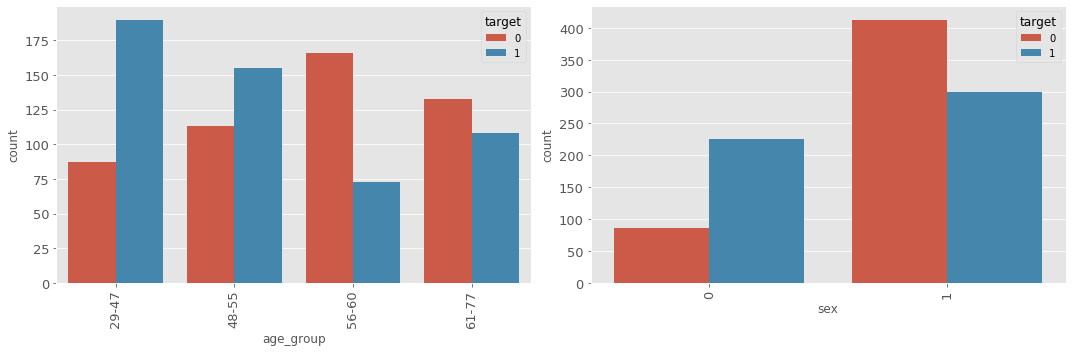

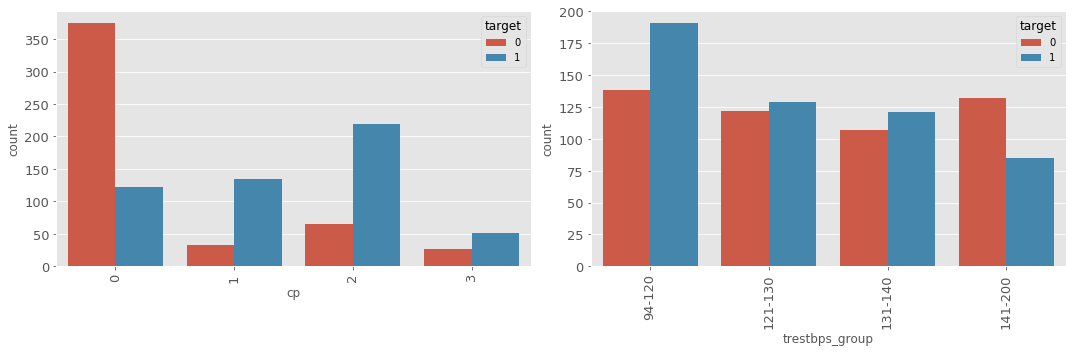

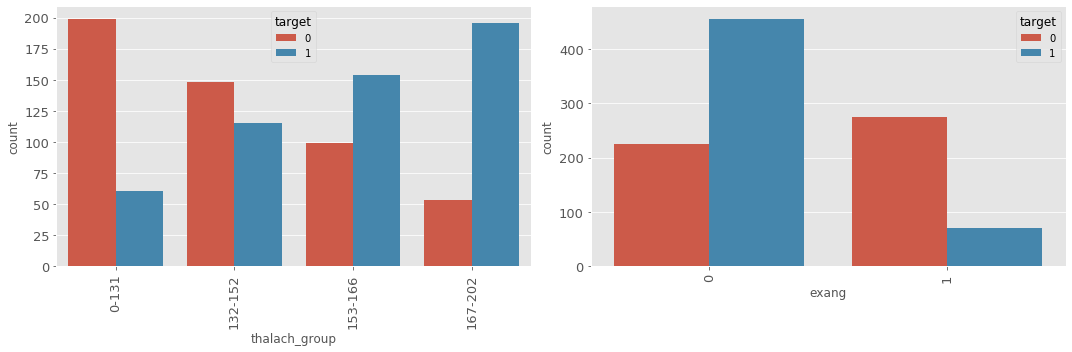

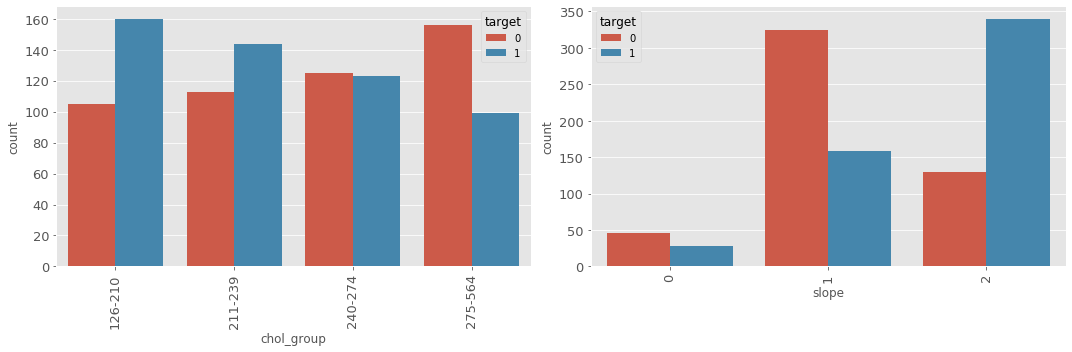

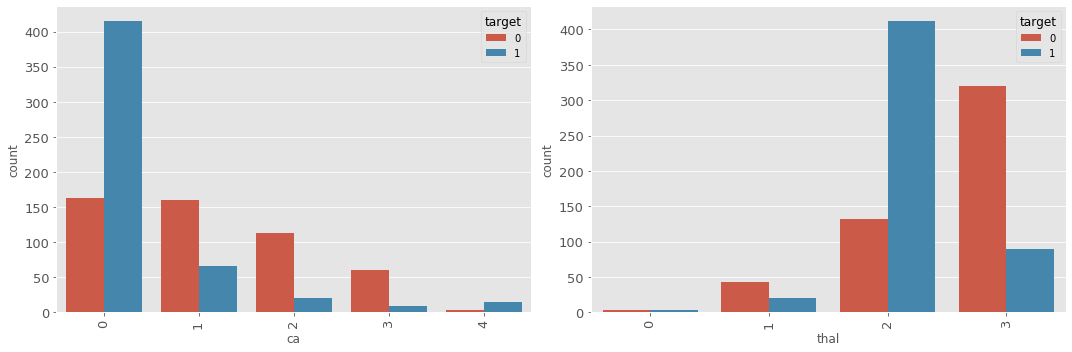

In [25]:
#Create a new dataframe for bivariate analysis
biv_data=df[['age_group','sex','cp','trestbps_group','thalach_group','exang','chol_group','slope','ca','thal','target']]
def bivariate_analysis_categorical(dataframe,target):
    categorical_columns =biv_data.select_dtypes(include=['int','float','category']).columns
    for i in range(0,len(categorical_columns),2):
        if len(categorical_columns) > i+1:
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.countplot(x=biv_data[categorical_columns[i]],hue=target,data=df)
            plt.xticks(rotation=90)
            plt.subplot(122)            
            sns.countplot(biv_data[categorical_columns[i+1]],hue=target,data=df)
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()


bivariate_analysis_categorical(biv_data,df['target'])

### **Observations :**

1. Looking at the age group vs target graph it is very shocking to see that the age group of 29-47 is having most number of heart disease cases.
2. The no. of cases in which  males having heart disease is high as compared to female
3. The patients having chest pain type are less prone to heart disease as compared to the patients having chest patient type 2 
4. The cholestrol levels of the patients mentioned in the reports are very high healthy cholestrol level is 125 to 200mg/dL
5. The ca is coronary artery there 5 types of cornary artery shown.Most of patients having heart disease are having problem with coronary artery 0 .
6. exang - Exercise induced angina . A test is performed on patient in which if he or she is made to run on treadmill if he or she suffers any chest pain during that process it says that the heart of that particular patient is weak . It is not necessary that if u do not have exang u dont have heart disease my visualisation is perfect example of that
7. slope is an attribute looked during ecg . The ecg waveform  of type 2  is having more heart disease cases
8. Thalach is maximum heart rate achieved , maximum heart rate is around 220 beats per minute (bpm) minus the person's age. Therefore, a 20-year-old's maximum heart rate would be around 200 bpm (220 minus 20 = 200 bpm). The group of max heart rate 167-202 is having most of the heart related problem

## **Feature Selection**
In this task let's use Recursive Feature Elimination for selecting the best features. RFE is a wrapper method that uses the model to identify the best features.

* The function feature selection takes four parameters predictors, target, model and the number_of_features. The parameter number_of_features is used for explicitly stating the number of features you want to specify inside the RFE object. For the below task, we have inputted 8 feature. You can change this value and input the number of features you want to retain for your model.



In [0]:
train_data=df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']]
X=train_data.drop('target',1)
y=train_data['target']

In [27]:
from sklearn.feature_selection import RFE
def feature_selection(predictors,target,number_of_features,model):

    models = model()
    rfe = RFE(models,number_of_features)
    rfe = rfe.fit(X,y)
    feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
    plt.show()
    print('Features  to be selected for {} are:'.format(str(i[0])))
    print(feature_ranking[feature_ranking.values==1].index.tolist())
    print('===='*30)
# Choosing the models. If you want to specify additional models, kindly specify them as a key-value pair as shown below.
models = {'Logistic Regression':LogisticRegression,'Decision Tree':DecisionTreeClassifier}
# Selecting 8 number of features
for i in models.items():
    feature_selection(X,y,8,i[1])

Features  to be selected for Logistic Regression are:
['sex', 'cp', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Features  to be selected for Decision Tree are:
['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']


## **Logistic Regression**

---
**What is Classification ?**

* Classification is a central topic in machine learning that has to do with teaching machines how to group together data by particular criteria. It is different from regression in the sense that target variables in classification are discrete in nature while in regression they are continuous. Remember that both regression and classification fall into the category of supervised learning approaches.There is an also an unsupervised version of the classification, called clustering where computers find shared characteristics by which to group data when categories are not specified.
**Examples of classification**

![alt text](https://i0.wp.com/dataaspirant.com/wp-content/uploads/2016/04/logisticregression.png?resize=690%2C345)

**What is the difference between linear regression and logistic regression?**

* Outcome: This is the fundamental and possibly the most intuitive difference between both the algorithms. In linear regression, the outcome (dependent variable) is continuous. It can have any one of an infinite number of possible values, for instance, weight, height, number of hours, etc. Whereas in logistic regression, the outcome (dependent variable) has only a limited number of possible values. For instance, yes/no, true/false,red/green/blue, 1st/2nd/3rd/4th, etc.

* Linear regression output as probabilities: It's tempting to use the linear regression output as probabilities but it's a mistake because the output can be negative, and greater than 1 whereas probability can not. As regression might actually produce probabilities that could be less than 0, or even bigger than 1, logistic regression was introduced.

* Upon addition of outliers, the best-fit line changes which in turn changes the threshold for the decision boundary.

* Linear combination of features spans from negative infinity to Positive infinity. But for a classification (binary) one you can have only two possible values


**Sigmoid Function**

We can overcome the issues of classification  with the help of the sigmoid function, also known as the S-curve. It looks somewhat like this:

   ![alt text](https://machinelearningblogcom.files.wordpress.com/2017/11/bildschirmfoto-2017-11-10-um-12-20-14.png?w=300&h=237)

In the figure, we consider negative labels as having the value 0 while the positive ones as being 1s.

* **Types of Logistic Regression**
1. Binary Logistic Regression
The categorical response has only two 2 possible outcomes. Example: Spam or Not

2. Multinomial Logistic Regression
Three or more categories without ordering. Example: Predicting which food is preferred more (Veg, Non-Veg, Vegan)

3. Ordinal Logistic Regression
Three or more categories with ordering. Example: Movie rating from 1 to 5

Our project is example of  binary logistic regression

* **Decision Boundary**

To predict which class a data belongs, a threshold can be set. Based upon this threshold, the obtained estimated probability is classified into classes.
Say, if predicted_value ≥ 0.5, then classify as customer will churn or predict as customer will not churn
The decision boundary is robust enough to deal with outliers.

![alt text](https://storage.googleapis.com/ga-commit-live-prod-live-data/account/b92/11111111-1111-1111-1111-000000000000/b-624/f82fb6a7-4eee-46f0-840b-1830a8752370/file.png)

Refer the link below for better intuiton of Logistic Regression

* [link text](https://youtu.be/yIYKR4sgzI8)

For Mathematical intuition visit the link below

* video 1 - [link text](https://youtu.be/vN5cNN2-HWE)
* video 2 - [link text](https://youtu.be/BfKanl1aSG0)



In [47]:
logistic_df=df[['sex', 'cp', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal','target']]
X=logistic_df.drop('target',1)
y=logistic_df['target']
scaler=MinMaxScaler()
clf=LogisticRegression(random_state=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9, stratify=y)
X_train_new=scaler.fit_transform(X_train)
X_test_new=scaler.transform(X_test)
clf.fit(X_train_new,y_train)
y_pred=clf.predict(X_test_new)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=9, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## **Evaluation Metric**


---
* **Confusion Matrix**

Also called the error matrix, it is a table describing the performance of a supervised machine learning model on the testing data, where the true values are unknown. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (and vice versa).

![alt text](https://storage.googleapis.com/ga-commit-live-stag-uat-data/account/b92/11111111-1111-1111-1111-000000000000/b376/03808ceb-2a3a-4828-9f7d-bdbe7a00c6a1/file.jpg)

Before going through the calculations, let's understand some terms:

* True Positives (TP): Actually positive and predicted positive (CORRECT PREDICTIONS)
* True Negatives (TN): Actually negative and predicted negative (CORRECT PREDICTIONS)
* False Positives (FP): Actually negative but predicted positive (INCORRECT PREDICTIONS)
* False Negatives (FN): Actually positive but predicted negative (INCORRECT PREDICTIONS)

In the above example with the binary outcome Cat($1$) or Non-cat($0$):
* Actual number of cats = 8
* Actual number of non-cats = 19

Now, from the predictions based on model,

* Predicted cats = 5 + 2 = 75+2=7
* Predicted non-cats = 3 + 17 = 203+17=20

So,

* TP = 5 i.e. actual cats and also predicted cats.

* FP = 2 i.e. actual non-cats but predicted cats.

* FN = 3 i.e. actual cats but predicted non-cats.

* TN = 17 i.e. actual non-cats and predicted non-cats.

we will be using a sklearn library to implement confusion matrix

* **Recall Score**

For every actual class, it is the fraction of the number of correct predictions to the total number of actual instances of the class. It answers the question Of all the instances of the class "X", what percentage did we predict correctly? Mathematically,

**Recall(R)= TP/TP+FN**

**When to use recall?**

Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative. For instance, in fraud detection or sick patient detection; if a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.

* **Precision Score**

Precision For every predicted class, it is the fraction of the correct predictions to the total number of predictions for that class. It answers the question Of all the values predicted as belonging to the class "X", what percentage is correct? Mathematically,

**Precision(P) = TP/TP+FP**

**When to use precision?**

Precision is a good measure to determine when the costs of False Positive is high. For instance, email spam detection. In email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model.

* **F1 Score:**

It is the harmonic mean of the precision and recall for a classifier. Mathematically,
**F score= 2PR/P+R**
P stands for precison
R stands for Recall

**When to use F1 score?**

If you want to achieve a balance between precision and recall, use the F-1 score. But unfortunately, the F-score isn’t the holy grail and has its tradeoffs. It favours classifiers that have similar precision and recall. This is a problem because you sometimes want a high precision and sometimes a high recall. The thing is that increasing precision results in a decreasing recall and vice versa. This is called the precision/recall tradeoff.

* **ROC-AUC score**

ROC stands for Receiver Operator Characteristic, is a curve that helps us visualize the performance of a binary classifier. The Area under the curve (AUC) of the ROC curve indicates the ability of the binary classifier to distinguish between both the classes. It is calculated using all possible threshold probabilities, unlike other metrics that use a fixed threshold.

Now, let us understand this using the actual ROC diagram which is a graphical plot of TPR on the Y-axis and FPR on the X-axis for various threshold settings. The TPR is nothing but the recall term that we had already discussed whereas FPR is the term which indicates how much the classifier incorrectly predicts a negative instance as positive.

Just for your information :

* **TPR=TP/TP+FN**
* **FPR=FP/FP+TN**

Below i have written a function to perform all this things together



In [0]:
def plot_cf_matrix_and_roc(model, 
                           X_train, 
                           y_train,
                           X_test, 
                           y_test,
                           y_pred, 
                           classes=[0,1],
                           normalize=False,
                           cmap=plt.cm.Blues):
    metrics_list = []
    
    # the main plot
    plt.figure(figsize=(15,5))

    # the confusion matrix
    plt.subplot(1,2,1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # the ROC curve
    plt.subplot(1,2,2)
    tmp = model.fit(X_train, y_train.ravel())
    y_pred_sample_score = tmp.decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)
    roc_auc = auc(fpr,tpr)

    # Plot ROC
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.01,1.0])
    plt.ylim([-0.01,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.tight_layout()
    
    # the result metrix
    summary_df = pd.DataFrame([[str(np.unique( y_pred )),
                               str(round(precision_score(y_test, y_pred.round()),3)),
                               str(round(accuracy_score(y_test, y_pred.round()),3)),
                               str(round(recall_score(y_test, y_pred.round(), average='binary'),3)),
                               str(round(roc_auc_score(y_test, y_pred.round()),3)),
                               str(round(roc_auc,3)),
                               str(round(f1_score(y_test, y_pred.round(), average='binary'),3))]], 
                              columns=['Class', 'Precision', 'Accuracy', 'Recall', 'ROC-AUC', 'AUC', 'F1-score'])
    # print the metrics
    print("\n");
    print(summary_df);
    print("\n");
    
    plt.show()



   Class Precision Accuracy Recall ROC-AUC    AUC F1-score
0  [0 1]     0.783    0.825  0.911   0.822  0.902    0.842




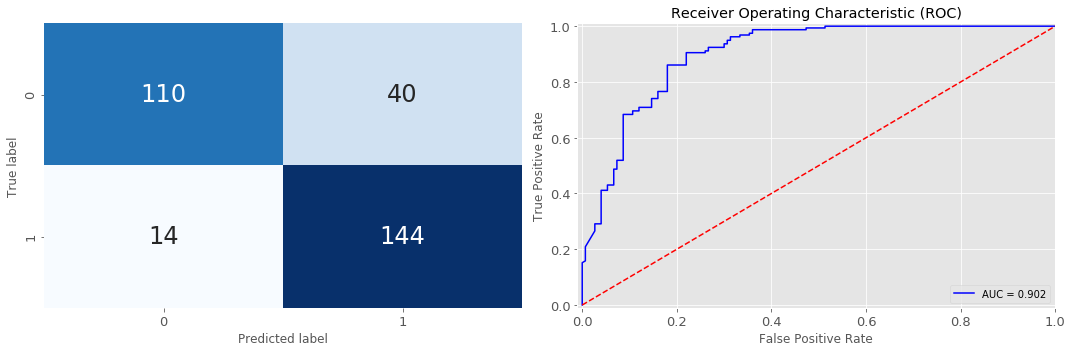

In [49]:
plot_cf_matrix_and_roc(clf, X_train_new, y_train, X_test_new, y_test, y_pred, classes=['NO','YES'])

## **Decision Tree**

---



**What is Decision Tree ?**

* A decision tree (also referred to as a classification tree or a reduction tree) is a predictive model which is a mapping from observations about an item to conclusions about its target value. 
* A single node is the starting point followed by binary questions that are asked as a method to arbitrarily partition the space of histories. As the space is partitioned, “leaves” are formed and training data is used to calculate the splitting criterion for the next element. As the traversal continues, the questioning becomes more informative by the use of splitting criterion metrics. Such metrics include entropy, Gini etc. 

**Terminology of Decision Tree**



![alt text](https://storage.googleapis.com/ga-commit-live-prod-live-data/account/b92/11111111-1111-1111-1111-000000000000/b-804/5a1cb610-cb12-412e-8a2e-bea1c86f0876/file.png)




* Root Node: Entire population or sample, further gets divided into two or more homogeneous sets.
* Parent and Child Node: Node which is divided into sub-nodes is called parent node, whereas sub-nodes are the child of parent node.
* Splitting: Process of dividing a node into two or more sub-nodes.
Decision Node: A sub-node that splits into further sub-nodes.
* Leaf/Terminal Node: Nodes that do not split.
* Pruning: When we remove sub-nodes of a decision node, this process is called pruning. (Opposite of Splitting)
* Branch/Sub-Tree: Sub-section of entire tree.


**Example of Decision Tree**


![alt text](https://ars.els-cdn.com/content/image/1-s2.0-S0065245816300742-f01-05-9780128122327.jpg?_)

* For example from above image, if a person wants to assess how much it would cost to live in certain neighborhoods, the simplified decision tree in figure could be used. The root node, Location, is evaluated with children nodes (Neighborhood, price.isMod) representing values for locations. The outputs for these logical tests are usually boolean values . we derive: “If location = city ∧ neighborhood = northside ∧ condition = excellent, then the price for homes in this area is expensive.”


**steps to build a decision tree**

1. Start with an empty tree.
2. Choose a feature to split the tree on.
3. For the split,
* if all examples are positive or negative
>  make the prediction.
* else
>  go to step 2

**Criterion to split the tree**

**Entropy :**
Entropy is defined as the degree of disorganization in a system. For a completely impure dataset the entropy is high and for a completely pure dataset the entropy is low .

The formula for entropy is given by,

* Entropy = -plogp - qlogq

where p is the probability of choosing the positive class and q is the probability of choosing the negative class.

**Gini :**

A Gini score gives an idea of how good a split is by how mixed the classes are in the two groups created by the split (similar to entropy).

* It works with categorical target variable “Success” or “Failure”
* A Gini score gives an idea of how good a split is by how mixed the classes are in the two groups created by the split.
* It measures how often a randomly chosen element would be incorrectly identified.
* A perfect separation results in a Gini score of 0, whereas the worst case split that results in 50/50 classes in each group results in a Gini score of 1.0 (for a 2 class problem).
* Higher the value of Gini higher the homogeneity

How to calculate gini for a split?

* Calculate Gini for sub-nodes, using formula sum of square of probability for success and failure


>  (1−(p^2+(1−p)^2))

* Calculate Gini for split using weighted Gini score of each node of that split










## **Tuning the Depth of a Tree**

---
* Finding the optimal value for max_depth is one way way to tune your model. The code below outputs the accuracy for decision trees with different values for max_depth.
* Since the graph below shows that the best accuracy for the model is when the parameter max_depth = 11.
* It is important to keep in mind that max_depth is not the same thing as depth of a decision tree. max_depth is a way to preprune a decision tree. In other words, if a tree is already as pure as possible at a depth, it will not continue to split. 
* You can change the max_depth_range accoording to your will and check the results 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'accuracy')

Text(0.5, 1.0, 'accuracy vs max_depth')

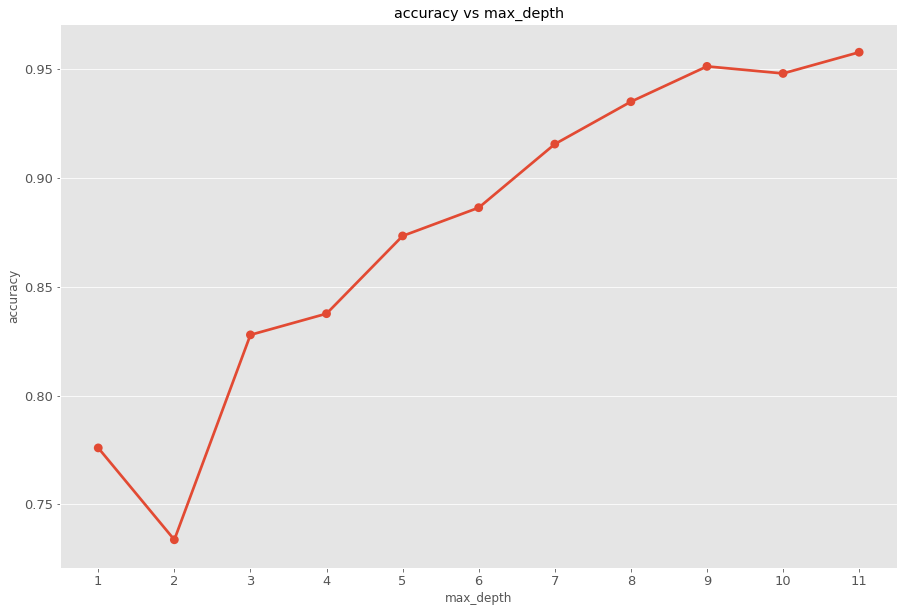

In [31]:
# List of values to try for max_depth:
max_depth_range = list(range(1,12))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 9)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)
    
x=max_depth_range
y=accuracy

plt.figure(figsize=(15,10))
sns.pointplot(x,y)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('accuracy vs max_depth')

**Practical implementation  of Decision Tree**


step 1 :The code shown in the cell below i am trying to create a dataframe of features on which i am going to build the Decision Tree model.

In [0]:
decision_df=df[['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal','target']]
X=decision_df.drop('target',1)
y=decision_df['target']

**step 2:**
 Splitting the data into train and test using the sklearn library.

>  from sklearn.model_selection import train_test_split



In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

**step 3:** Building the Decision Tree model using sklearn library The library shown below

In [53]:
#Implementing decision tree 
decision_model = DecisionTreeClassifier(random_state=9,max_depth=11)
decision_model.fit(X_train,y_train)
y_pred_1=decision_model.predict(X_test)
train_score=decision_model.score(X_train,y_train)
print('Accuracy of train data:',train_score)
print('=='*100)
acc = decision_model.score(X_test,y_test)
print('Accuracy on test data:',acc)
print('=='*100)
depth = decision_model.get_depth()
print('Depth of tree:',depth)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

Accuracy of train data: 1.0
Accuracy on test data: 0.9902597402597403
Depth of tree: 10


**step 4:**
 ###  **Tree Visualisation**


---
At each level, we have the following information :-

the condition of the split at the particular node.
* entropy - the entropy of the data before the split
* samples - the number of samples of data before the split (at that node)
* value - the classwise distribution of the samples
* class - the class decision for any element at that node. (if you were to assign a class label to a data point at that node, what label to assign.)


The figure shown below is the Decision tree for our dataset with max_depth=10.We had 1025 records hence it was expected that the decision tree might be complex.Imagine in real life where there are millions of records and you apply decision tree visualising and interpreting that tree will be next to impossible hence at such times it is not necessary to visualise the tree . You can make your decision based on its accuracy and observe it if it is correct or not by viewing the confusion matrix.Also you can try  ***fearture_importance_*** command to check which feature is given more importance by decision tree.

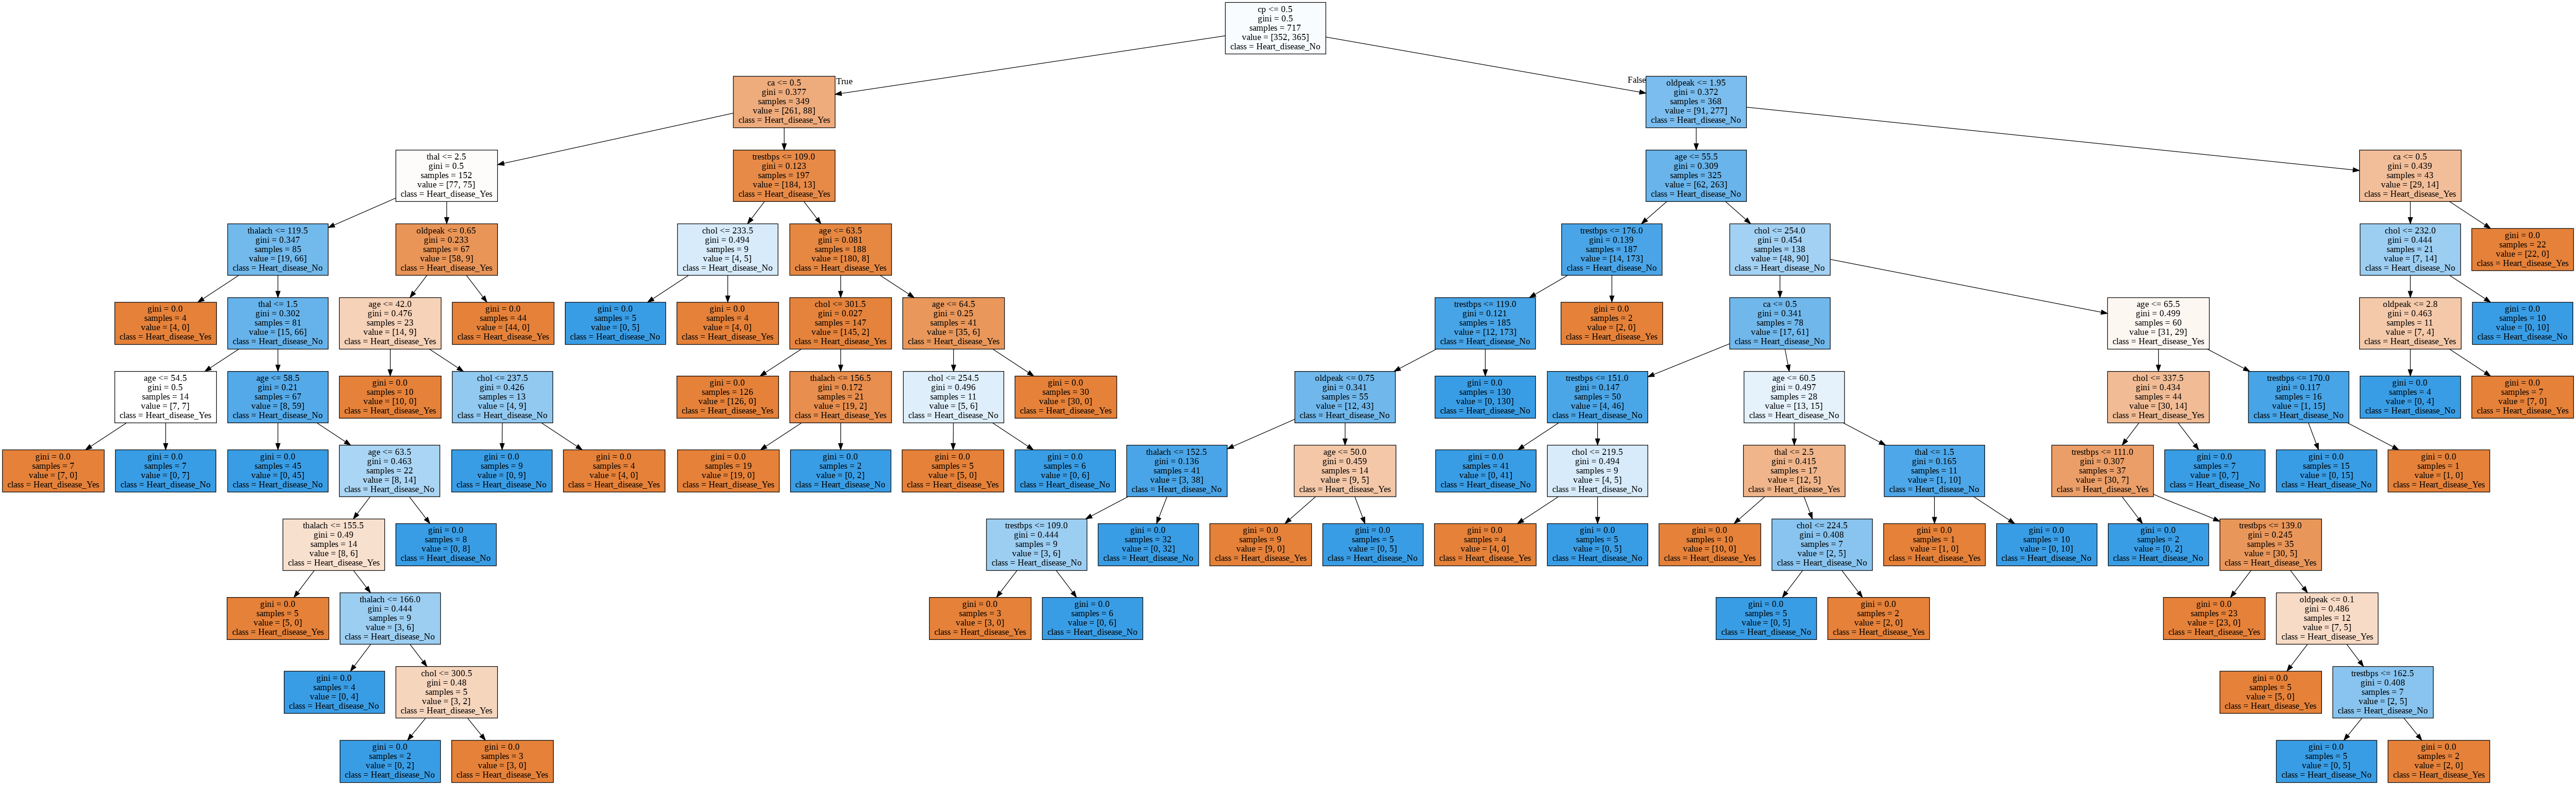

In [54]:
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(decision_tree = decision_model , out_file = None, feature_names = X_train.columns , filled =True , class_names=['Heart_disease_Yes','Heart_disease_No'])
graph_big = pydotplus.graph_from_dot_data(dot_data)
Image(graph_big.create_png())

## **Feature Importance in Decision Tree**


---
One advantage of decision tree is that you can look at the importance of features. Based on the output, we can infer that cp - chest pain is the most important feature . trestbps - resting blood pressure is the least important feature


In [55]:
# fit on data
decision_model.fit(X_train,y_train)

# feature importances 
print("Feature importances are:", dict(zip(X.columns, np.round(decision_model.feature_importances_,3))))


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

Feature importances are: {'age': 0.162, 'cp': 0.25, 'trestbps': 0.08, 'chol': 0.121, 'thalach': 0.041, 'oldpeak': 0.104, 'ca': 0.129, 'thal': 0.112}


## **Confusion Matrix**


---
After observing the confusion matrix it is pretty much evident that our decision tree is highly accuracte. With very low false positive and with very few false negatives.


Text(0.5, 1.0, 'Decision Tree Classifier Confusion Matrix')

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       147
           1       0.98      1.00      0.99       161

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



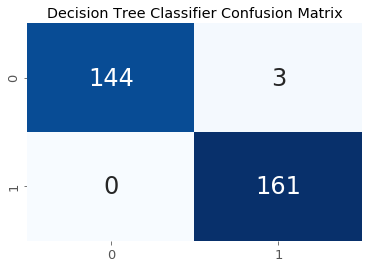

In [56]:
#Confusion Matrix of decisiontree
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred_1)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


#Classification Report
from sklearn.metrics import classification_report
class_report=classification_report(y_test,y_pred_1)
print(class_report)


## Which model is better for this business case ?



---
I have created two supervised ML model for this particular business case
Lets compare the performance both the model and see which one is performing better.





   Class Precision Accuracy Recall ROC-AUC    AUC F1-score
0  [0 1]     0.783    0.825  0.911   0.822  0.902    0.842




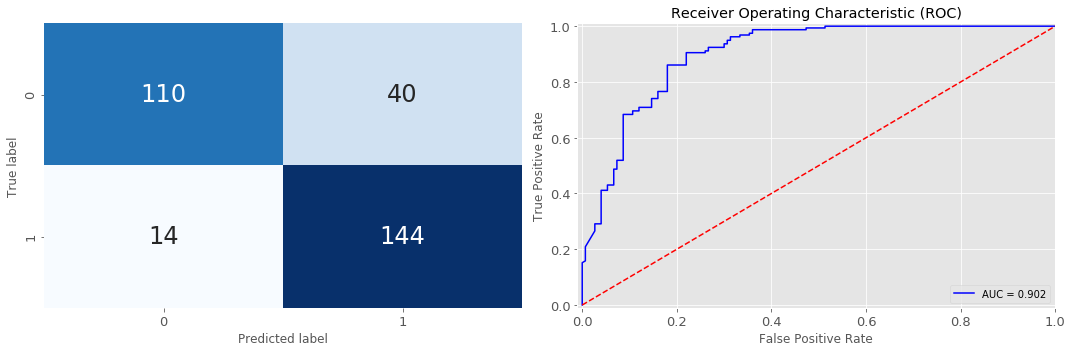

In [30]:
#For logisitic regression
plot_cf_matrix_and_roc(clf, X_train_new, y_train, X_test_new, y_test, y_pred, classes=['NO','YES'])

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       147
           1       0.98      1.00      0.99       161

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



Text(0.5, 1, 'Decision Tree classifier confusion matrix')

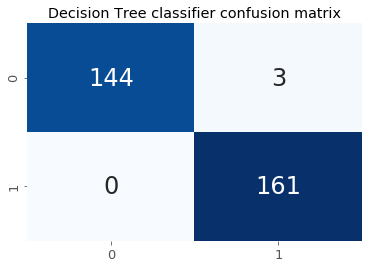

In [45]:
#For Decision Tree
#Classification Report
from sklearn.metrics import classification_report
class_report=classification_report(y_test,y_pred_1)
print(class_report)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred_1)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.title('Decision Tree classifier confusion matrix')



## **Conclusion:**

Based on th results of both the model Decision tree wins in all terms . And also after carefully observing both the confusion matrix . You can see that False positive is completely zero in Decision tree while in logistic regression you can see there are 14 false positive results.
And in our business case False positive can cost us a patients life . Hence decision tree is the best ML model as compared to logistic regression in this particular Business case.